# Project: Exploratory Data Analysis of TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#literature">Literature</a></li>
</ul>

<a id='intro'></a>
## Introduction

For the Project: Exploratory Data Analysis I chose the TMDb movie dataset which was provided for this project. The dataset contains data of 10.866 movies with data for example about the cast, budget, popularity and release date. Since I am a huge movie fan and favorable of science-fiction, comedy and action movies as well as actress Scarlett Johansson my questions I want to answer in this exploratory data analysis will revolve around this genre preferences and cast:

1. Are there any trends to find in movies of the genre action, comedy and science fiction concerning the release date and popularity?
2. How popular are movies featuring Scarlett Johansson and in which genres is she featured in the most?
3. How well received are movies of the genres action and science fiction featuring Scarlett Johansson?

In [1]:
#Importing the packages needed for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

At first the dataset has to be examined to identify missing data, wrong data types and inconsistent data. After this examination the issues with the dataset have to be cleaned so it can be proceed to the exploratory data analysis.

### General Properties

The general properties give a look into all the necessary information to learn about the dataset.

In [2]:
#Loading the CSV into a dataframe
movie_data = pd.read_csv('tmdb-movies.csv', encoding='utf-8')

In [3]:
#Investigating the loaded data
movie_data.sample(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1910,39246,tt1370889,0.002460,0,0,Talhotblond,NaN,NaN,Barbara Schroeder,NaN,...,This is the true story of a love triangle that...,83,Documentary,NaN,2/1/09,11,6.0,2009,0.000000e+00,0.000000e+00
6909,15667,tt0454864,0.108669,0,0,The Last Winter,Ron Perlman|James Le Gros|Connie Britton|Zach ...,NaN,Larry Fessenden,What if mankind only had one season left on Ea...,...,"In the Arctic region of Northern Alaska, an oi...",101,Horror|Thriller,Glass Eye Pix|Zik Zak Kvikmyndir|Antidote Film...,9/11/06,17,5.9,2006,0.000000e+00,0.000000e+00
10185,10774,tt0074958,0.476406,3800000,23689877,Network,Faye Dunaway|William Holden|Peter Finch|Robert...,NaN,Sidney Lumet,Not since the dawn of time has America experie...,...,A TV network cynically exploits a deranged ex-...,121,Drama,United Artists|Metro-Goldwyn-Mayer (MGM),11/1/76,161,7.4,1976,1.456045e+07,9.077245e+07
2642,676,tt0213149,2.478879,140000000,449220945,Pearl Harbor,Ben Affleck|Josh Hartnett|Kate Beckinsale|Cuba...,NaN,Michael Bay,"December 7, 1941 - A day that shall live in in...",...,The lifelong friendship between Rafe McCawley ...,183,History|Romance|War,Jerry Bruckheimer Films|Touchstone Pictures,5/21/01,1044,6.6,2001,1.724083e+08,5.532103e+08
2087,51250,tt1560954,0.598083,10000000,0,Gun,50 Cent|Val Kilmer|AnnaLynne McCord|James Rema...,NaN,Jessy Terrero,One Gun. Many Lives Lost.,...,A drama set in the world of weapon dealing.,81,Action|Thriller,Cheetah Vision|Hannibal Pictures|Emmett Furla ...,6/10/10,20,5.1,2010,1.000000e+07,0.000000e+00


In [4]:
movie_data.shape

(10866, 21)

In [5]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
movie_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


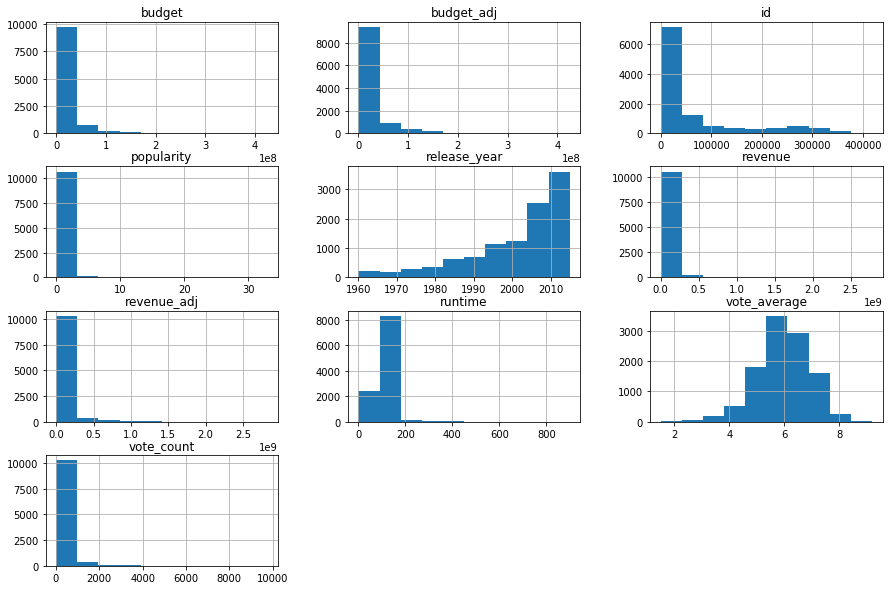

In [7]:
movie_data.hist(figsize=(15,10));

### Examination Findings

- The release_year and release_date are in seperate columns and the release_date is imported as an object.
- The dataset contains columns which are not needed for the EDA. These columns are id, imdb_id, homepage, release_year (after combination with the release_date), budget_adj and revenue_adj (since _adj columns show the budget and revenue in terms of 2010 Dollars, which is not needed in my EDA).
- Missing data for cast, director, tagline, keywords, overview, genres and production_companies.


### Data Cleaning

In the data cleaning step the examined issues above will be cleaned.

1. Combine release_year and release_date to integrate a proper date type for the EDA

In [8]:
#Changing release year to string and join it to the month and day of release_date to change it to a functional datetime
movie_data.release_date = movie_data.release_date.str[:-2]+movie_data.release_year.astype(str)

In [9]:
#Change release_date to datetime-type
movie_data.release_date = pd.to_datetime(movie_data.release_date, format="%m/%d/%Y")

In [10]:
#Check for sucess
movie_data.release_date.sample(5)

8939   1982-09-24
9858   1962-04-22
6354   2005-07-29
1797   2009-02-05
3559   2011-02-03
Name: release_date, dtype: datetime64[ns]

2. Dropping the columns I don't need for the EDA

In [11]:
#Dropping prior defined not needed columns
movie_data.drop(['id', 'imdb_id', 'homepage', 'release_year','budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [12]:
#Check for sucess
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(8)
memory usage: 1.2+ MB


3. Missing data

In [13]:
#Checking for number of missing data in the columns
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(8)
memory usage: 1.2+ MB


Since all the columns with missing data are of the data type object, I cannot replace these missing values with the mean for example. But for my research questions I stated in the introduction, these missing data is not necessary. So I can accept, that these data is missing.

<a id='eda'></a>
## Exploratory Data Analysis

Since I am just interested in th eexploration of movies of the genre Action, Science Fiction and Comedy and movies with actress Scarlett Johansson, I create masks for easier plotting.

In [14]:
#Creating masks first for easier coding
action = movie_data.genres.str.contains('Action') == True
science = movie_data.genres.str.contains('Science Fiction') == True
comedy = movie_data.genres.str.contains('Comedy') == True
scarlett = movie_data.cast.str.contains('Scarlett Johansson') == True

### Research Question 1: Are there any trends to find in movies of the genre Action, Science Fiction and Comedy concerning the release date & popularity?

Since there are movies with more genres, I want to check first how much overlap exists, so I can take that into account when intepreting the bar charts.

In [15]:
#Number of movies who have the genre
print('Movies with genre Action: ' + str(sum(movie_data.index[action].value_counts())))
print('Movies with genre Science Fiction: ' + str(sum(movie_data.index[science].value_counts())))
print('Movies with genre Comedy: ' + str(sum(movie_data.index[comedy].value_counts())))

Movies with genre Action: 2385
Movies with genre Science Fiction: 1230
Movies with genre Comedy: 3793


In [16]:
#Number of movies who have overlap in their genre
print('Overlap of genre Action, Science Fiction & Comedy: ' + str(sum(movie_data.index[action&science&comedy].value_counts())))
print('Overlap of genre Action & Science Fiction: ' + str(sum(movie_data.index[action&science].value_counts())))
print('Overlap of genre Action & Comedy: ' + str(sum(movie_data.index[action&comedy].value_counts())))
print('Overlap of genre Science Fiction & Comedy: ' + str(sum(movie_data.index[science&comedy].value_counts())))

Overlap of genre Action, Science Fiction & Comedy: 71
Overlap of genre Action & Science Fiction: 537
Overlap of genre Action & Comedy: 548
Overlap of genre Science Fiction & Comedy: 259


So this numbers have to be taken into account when interpreting the bar charts. For example: Since 43% of the movies of the genre Science Fiction are also of the genre Action it can be possible, that the bar chart for the genre Science Fiction can have similarities with the bar chart of the genre Action.

#### Release Date

For the first analysis I want to find out, how many movies are released over the existing timeline of the data. 

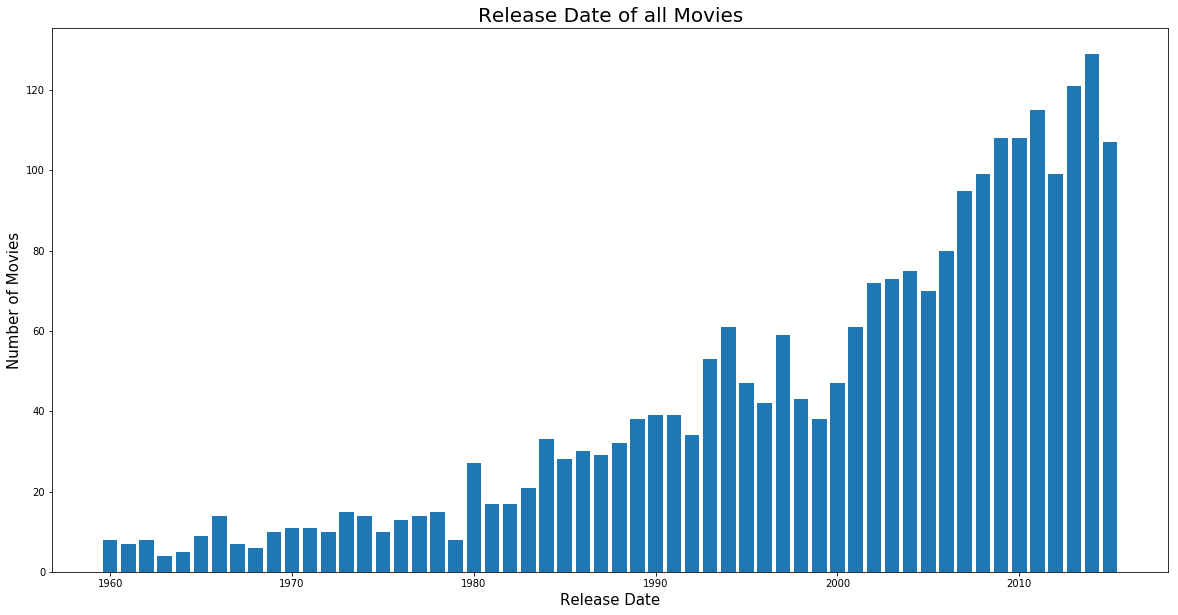

In [17]:
#Defining Plot
plt.figure(figsize=(20,10))
plt.title('Release Date of all Movies', fontdict={'fontsize':20})
plt.xlabel('Release Date', fontdict={'fontsize':15})
plt.ylabel('Number of Movies', fontdict={'fontsize':15})

#Plotting Data
plt.bar(movie_data.release_date.dt.year[action].value_counts().index.sort_values(), 
        movie_data.original_title[action].groupby([movie_data.release_date.dt.year]).count())

plt.show()

As seen above, most of the movies of the dataset have a release date later than the year 2000. So, to find out, if there are time periods, where different genres where released more than others, I have to calculate the percentage of movies with the respective genre to all of the movies of the release year. for a easier comparison, I also modeled the mean percentage of the depicted bars, to see in which years are more movies of the genre released then overall.

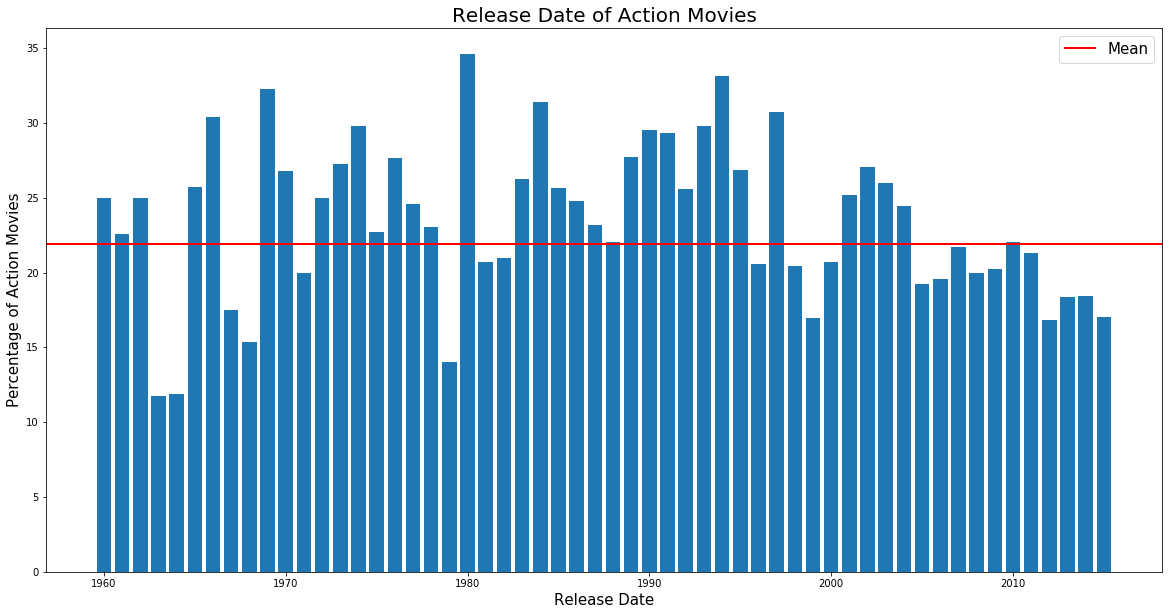

In [18]:
#Defining Plot
plt.figure(figsize=(20,10))
plt.title('Release Date of Action Movies', fontdict={'fontsize':20})
plt.xlabel('Release Date', fontdict={'fontsize':15})
plt.ylabel('Percentage of Action Movies', fontdict={'fontsize':15})

#Plotting Data
plt.bar(movie_data.release_date.dt.year[action].value_counts().index.sort_values(), 
        (movie_data.original_title[action].groupby([movie_data.release_date.dt.year]).count()/
         movie_data.original_title.groupby([movie_data.release_date.dt.year]).count())*100)

#Plotting Mean
plt.axhline((movie_data.original_title[action].groupby([movie_data.release_date.dt.year]).count().sum()/
         movie_data.original_title.groupby([movie_data.release_date.dt.year]).count().sum())*100, color='r', label='Mean', linewidth=2)

plt.legend(prop={'size': 15})
plt.show()

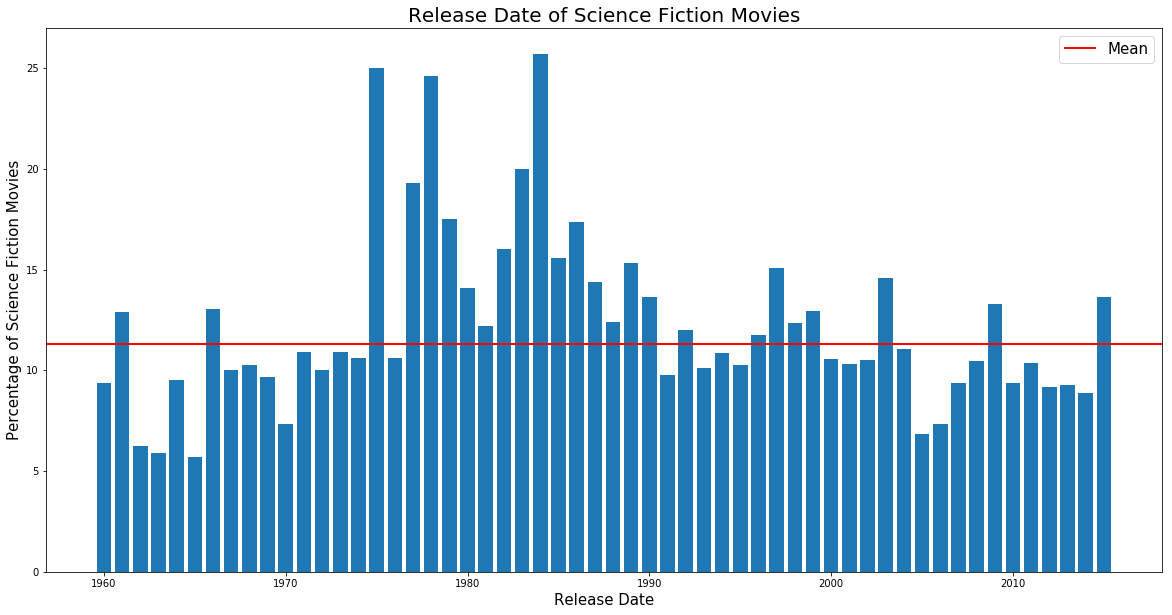

In [19]:
#Defining Plot
plt.figure(figsize=(20,10))
plt.title('Release Date of Science Fiction Movies', fontdict={'fontsize':20})
plt.xlabel('Release Date', fontdict={'fontsize':15})
plt.ylabel('Percentage of Science Fiction Movies', fontdict={'fontsize':15})

#Plotting Data
plt.bar(movie_data.release_date.dt.year[science].value_counts().index.sort_values(), 
        (movie_data.original_title[science].groupby([movie_data.release_date.dt.year]).count()/
         movie_data.original_title.groupby([movie_data.release_date.dt.year]).count())*100)

#Plotting Mean
plt.axhline((movie_data.original_title[science].groupby([movie_data.release_date.dt.year]).count().sum()/
         movie_data.original_title.groupby([movie_data.release_date.dt.year]).count().sum())*100, color='r', label='Mean', linewidth=2)

plt.legend(prop={'size': 15})
plt.show()

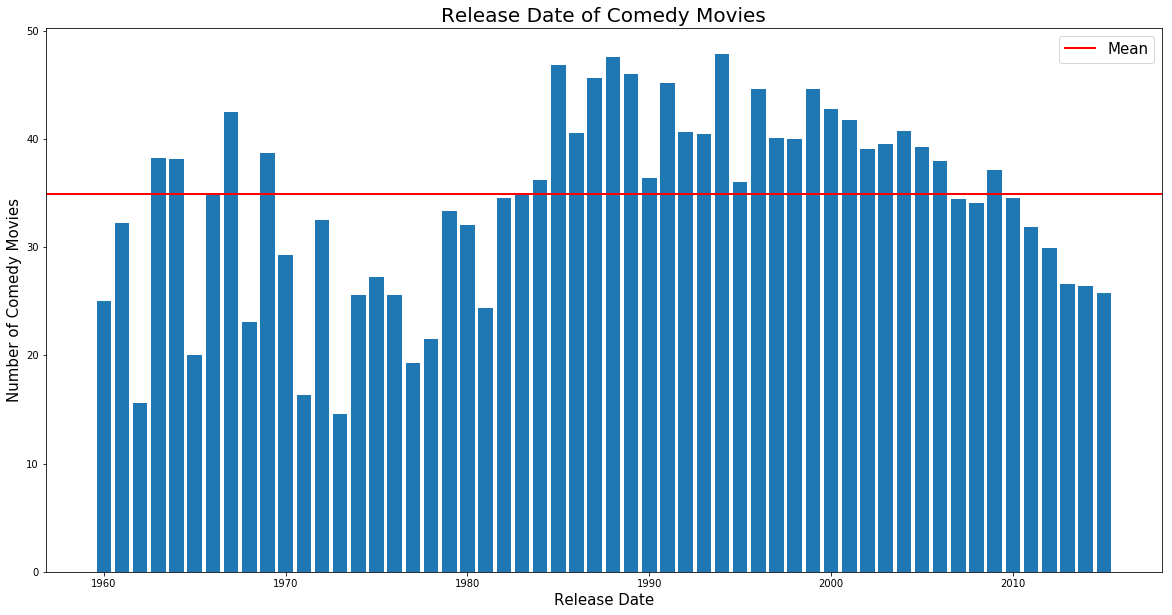

In [20]:
#Defining Plot
plt.figure(figsize=(20,10))
plt.title('Release Date of Comedy Movies', fontdict={'fontsize':20})
plt.xlabel('Release Date', fontdict={'fontsize':15})
plt.ylabel('Number of Comedy Movies', fontdict={'fontsize':15})

#Plotting Data
plt.bar(movie_data.release_date.dt.year[comedy].value_counts().index.sort_values(), 
        (movie_data.original_title[comedy].groupby([movie_data.release_date.dt.year]).count()/
         movie_data.original_title.groupby([movie_data.release_date.dt.year]).count())*100)

#Plotting Mean
plt.axhline((movie_data.original_title[comedy].groupby([movie_data.release_date.dt.year]).count().sum()/
         movie_data.original_title.groupby([movie_data.release_date.dt.year]).count().sum())*100, color='r', label='Mean', linewidth=2)

plt.legend(prop={'size': 15})
plt.show()

For the Conclusion at the end of the EDA, I combine the three plots.

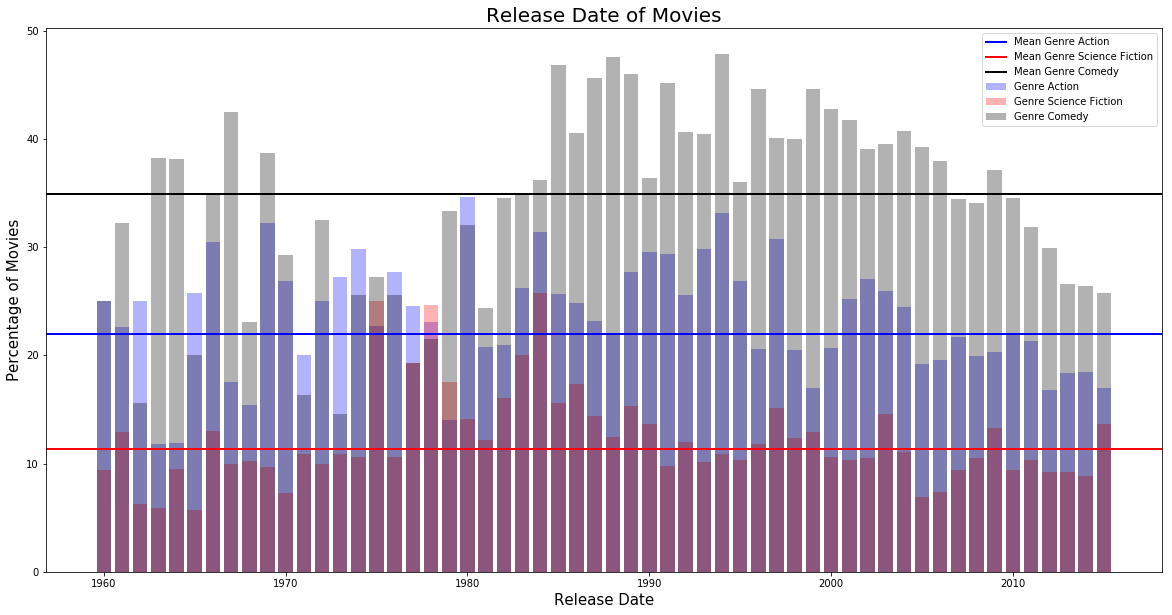

In [21]:
#Defining Plot
plt.figure(figsize=(20,10))
plt.title('Release Date of Movies', fontdict={'fontsize':20})
plt.xlabel('Release Date', fontdict={'fontsize':15})
plt.ylabel('Percentage of Movies', fontdict={'fontsize':15})
plt.legend(prop={'size': 15})

#Plotting Genre Action
plt.bar(movie_data.release_date.dt.year[action].value_counts().index.sort_values(), 
        (movie_data.original_title[action].groupby([movie_data.release_date.dt.year]).count()/
         movie_data.original_title.groupby([movie_data.release_date.dt.year]).count())*100,
        label='Genre Action', alpha=0.3, color='b')
plt.axhline((movie_data.original_title[action].groupby([movie_data.release_date.dt.year]).count().sum()/
             movie_data.original_title.groupby([movie_data.release_date.dt.year]).count().sum())*100,
            color='b', label='Mean Genre Action', linewidth=2)

#Plotting Genre Science Fiction
plt.bar(movie_data.release_date.dt.year[science].value_counts().index.sort_values(), 
        (movie_data.original_title[science].groupby([movie_data.release_date.dt.year]).count()/
         movie_data.original_title.groupby([movie_data.release_date.dt.year]).count())*100, 
        label='Genre Science Fiction', alpha=0.3, color='r')
plt.axhline((movie_data.original_title[science].groupby([movie_data.release_date.dt.year]).count().sum()/
             movie_data.original_title.groupby([movie_data.release_date.dt.year]).count().sum())*100,
            color='r', label='Mean Genre Science Fiction', linewidth=2)

#Plotting Genre Comdey
plt.bar(movie_data.release_date.dt.year[comedy].value_counts().index.sort_values(), 
        (movie_data.original_title[comedy].groupby([movie_data.release_date.dt.year]).count()/
         movie_data.original_title.groupby([movie_data.release_date.dt.year]).count())*100,
        label='Genre Comedy', alpha=0.3, color='black')
plt.axhline((movie_data.original_title[comedy].groupby([movie_data.release_date.dt.year]).count().sum()/
             movie_data.original_title.groupby([movie_data.release_date.dt.year]).count().sum())*100,
            color='black', label='Mean Genre Comedy', linewidth=2)

plt.legend(prop={'size': 10})
plt.show()

#### Popularity

For the second analysis I want to check how the popularity for the three different genres changed over the years. First of all I am checking the overall popularity of the genres and Plotting them with the mean of the Popularit yof all Movies.

In [22]:
#Creating a new df with the mean of the popularity of movies with the mentioned genre
overall_pop = {'genre':['Action', 'Science Fiction', 'Comedy'],
              'popularity_mean': [movie_data.popularity[action].mean(), 
                             movie_data.popularity[science].mean(), 
                             movie_data.popularity[comedy].mean()]}
genre_pop = pd.DataFrame(overall_pop, columns=['genre', 'popularity_mean'])
genre_pop

,genre,popularity_mean
0,Action,0.926136
1,Science Fiction,1.001218
2,Comedy,0.592607


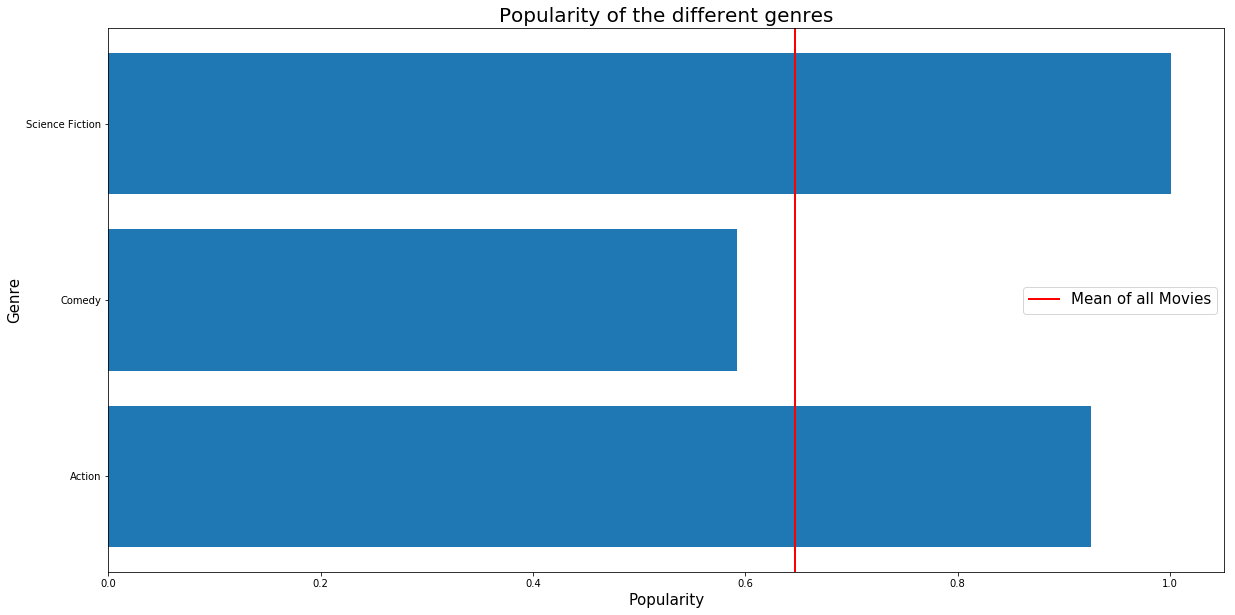

In [23]:
#Defining Plot
plt.figure(figsize=(20,10))
plt.title('Popularity of the different genres', fontdict={'fontsize':20})
plt.xlabel('Popularity', fontdict={'fontsize':15})
plt.ylabel('Genre', fontdict={'fontsize':15})

#Plotting data
plt.barh(genre_pop.genre, genre_pop.popularity_mean)

#Plotting general Mean
plt.axvline(movie_data.popularity.mean(), color='r', label='Mean of all Movies', linewidth=2)

plt.legend(prop={'size': 15})
plt.show()

Then after checking the Popularity of the different genres in comparison to the overall mean, I plot the popularity of the three genres over the release years to explore, if there the popularity of movies from different years in the genre is changing

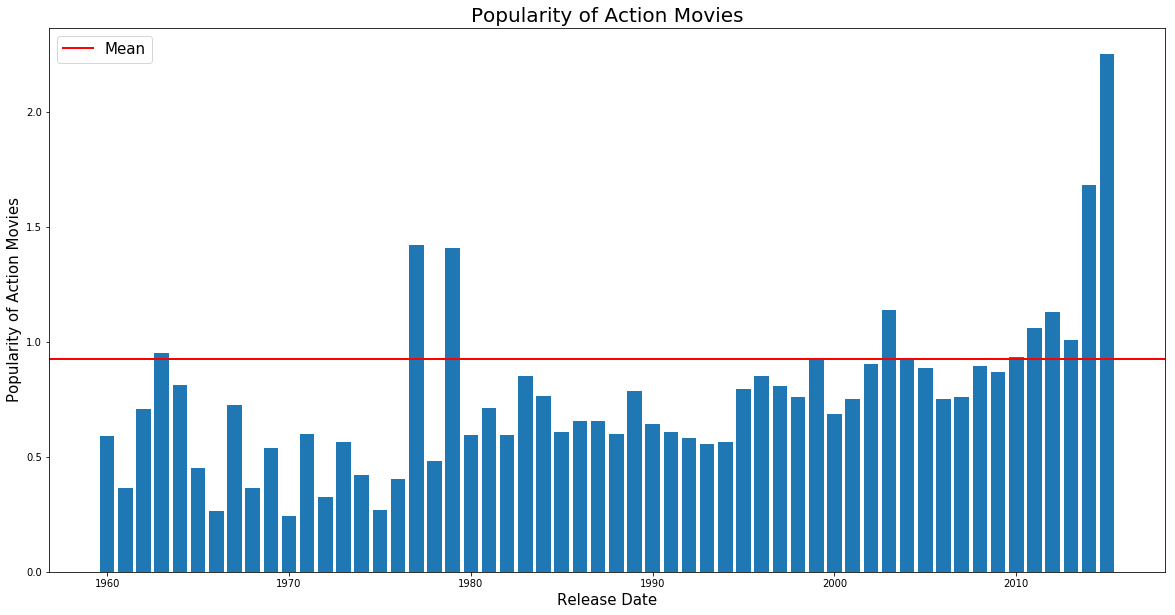

In [24]:
#Defining Plot
plt.figure(figsize=(20,10))
plt.title('Popularity of Action Movies', fontdict={'fontsize':20})
plt.xlabel('Release Date', fontdict={'fontsize':15})
plt.ylabel('Popularity of Action Movies', fontdict={'fontsize':15})

#Plotting Data
plt.bar(movie_data.release_date.dt.year[action].value_counts().index.sort_values(), 
        movie_data.popularity[action].groupby([movie_data.release_date.dt.year]).mean())

#Plotting Mean
plt.axhline(movie_data.popularity[action].mean(), color='r', label='Mean', linewidth=2)

plt.legend(prop={'size': 15})
plt.show()

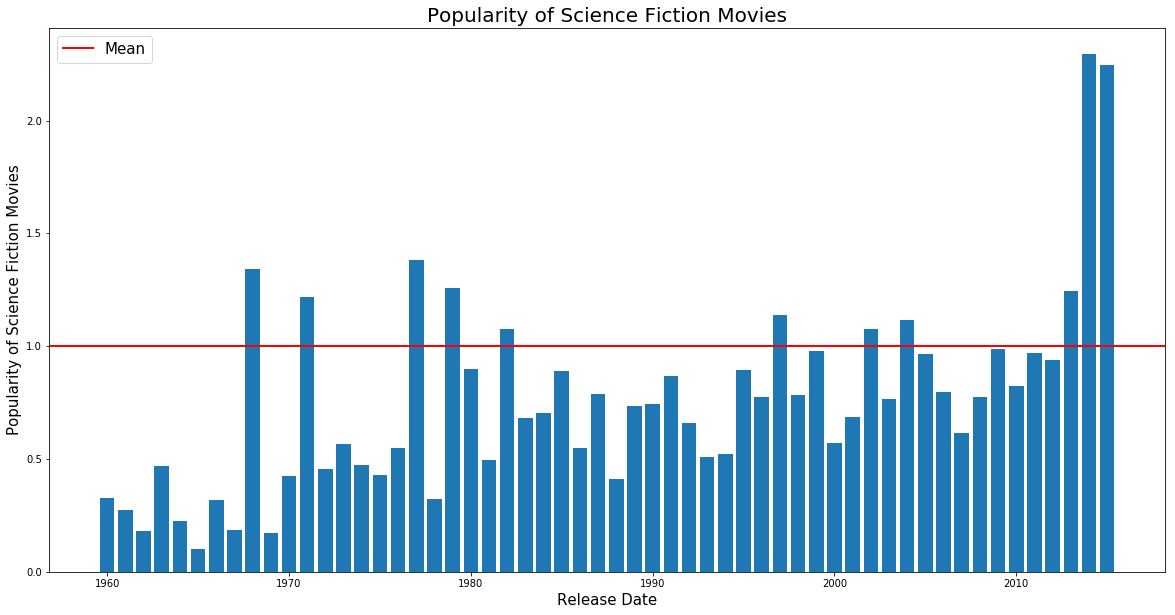

In [25]:
#Defining Plot
plt.figure(figsize=(20,10))
plt.title('Popularity of Science Fiction Movies', fontdict={'fontsize':20})
plt.xlabel('Release Date', fontdict={'fontsize':15})
plt.ylabel('Popularity of Science Fiction Movies', fontdict={'fontsize':15})

#Plotting Data
plt.bar(movie_data.release_date.dt.year[science].value_counts().index.sort_values(), 
        movie_data.popularity[science].groupby([movie_data.release_date.dt.year]).mean())

#Plotting Mean
plt.axhline(movie_data.popularity[science].mean(), color='r', label='Mean', linewidth=2)

plt.legend(prop={'size': 15})
plt.show()

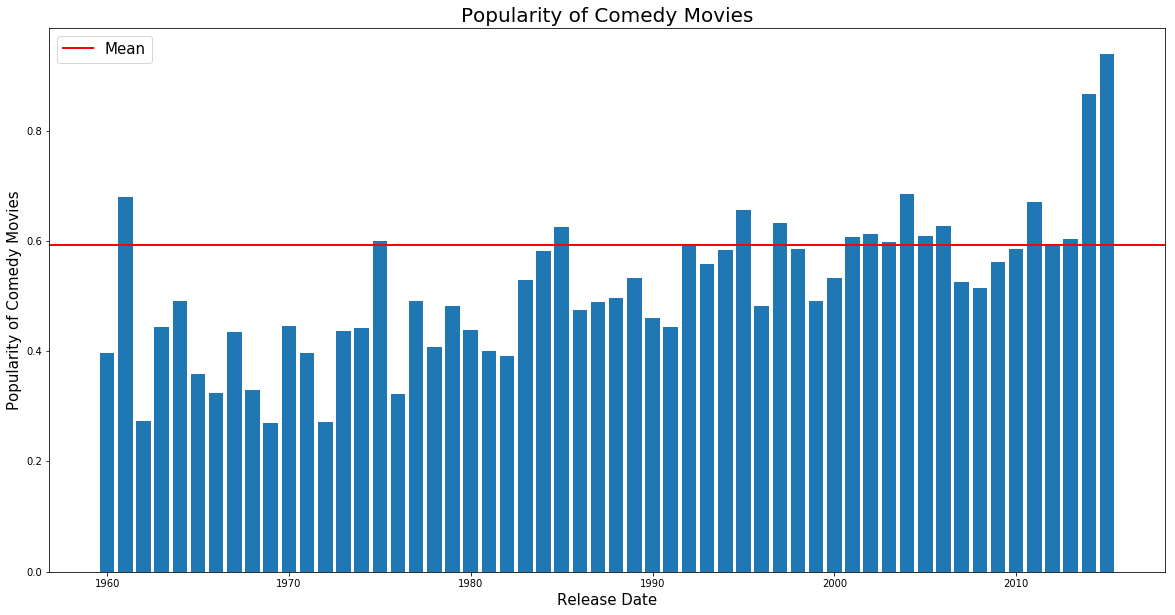

In [26]:
#Defining Plot
plt.figure(figsize=(20,10))
plt.title('Popularity of Comedy Movies', fontdict={'fontsize':20})
plt.xlabel('Release Date', fontdict={'fontsize':15})
plt.ylabel('Popularity of Comedy Movies', fontdict={'fontsize':15})

#Plottig Data
plt.bar(movie_data.release_date.dt.year[comedy].value_counts().index.sort_values(), 
        movie_data.popularity[comedy].groupby([movie_data.release_date.dt.year]).mean())

#Plotting Mean
plt.axhline(movie_data.popularity[comedy].mean(), color='r', label='Mean', linewidth=2)

plt.legend(prop={'size': 15})
plt.show()

For the Conclusion at the end of the EDA, I combine these three plots.

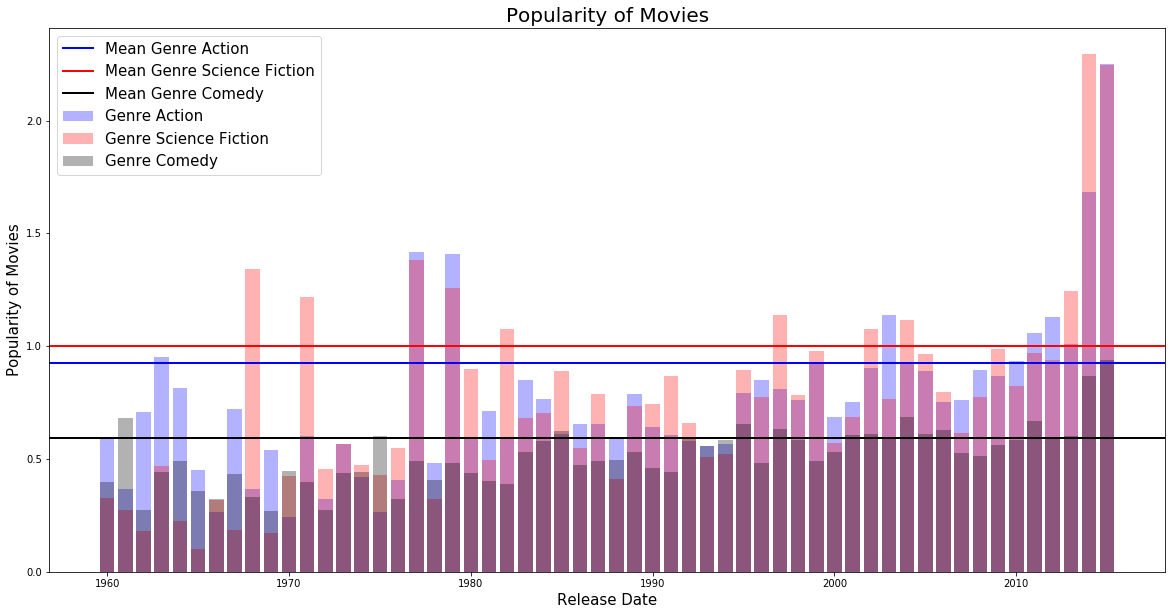

In [27]:
#Defining Plot
plt.figure(figsize=(20,10))
plt.title('Popularity of Movies', fontdict={'fontsize':20})
plt.xlabel('Release Date', fontdict={'fontsize':15})
plt.ylabel('Popularity of Movies', fontdict={'fontsize':15})

#Plotting genre Action
plt.bar(movie_data.release_date.dt.year[action].value_counts().index.sort_values(), 
        movie_data.popularity[action].groupby([movie_data.release_date.dt.year]).mean(),
        label='Genre Action', alpha=0.3, color='b')
plt.axhline(movie_data.popularity[action].mean(),
            color='b', label='Mean Genre Action', linewidth=2)

#Plotting Genre Sciene Fiction
plt.bar(movie_data.release_date.dt.year[science].value_counts().index.sort_values(), 
        movie_data.popularity[science].groupby([movie_data.release_date.dt.year]).mean(),
        label='Genre Science Fiction', alpha=0.3, color='r')
plt.axhline(movie_data.popularity[science].mean(), color='r', label='Mean Genre Science Fiction', linewidth=2)

#Plotting Genre Comedy
plt.bar(movie_data.release_date.dt.year[comedy].value_counts().index.sort_values(), 
        movie_data.popularity[comedy].groupby([movie_data.release_date.dt.year]).mean(),
        label='Genre Comedy', alpha=0.3, color='black')
plt.axhline(movie_data.popularity[comedy].mean(),
            color='black', label='Mean Genre Comedy', linewidth=2)

plt.legend(prop={'size': 15})
plt.show()

### Research Question 2: How popular are movies featuring Scarlett Johansson and in which genres is she featured in the most?

#### Popularity of Scarlett Johansson Movies

First of all I plot all movies which feature Scarlett Johansson sorted by their release date and plot the Popularity Mean of all movies and the Popularity Mean of movies featuring scarlett Johansson

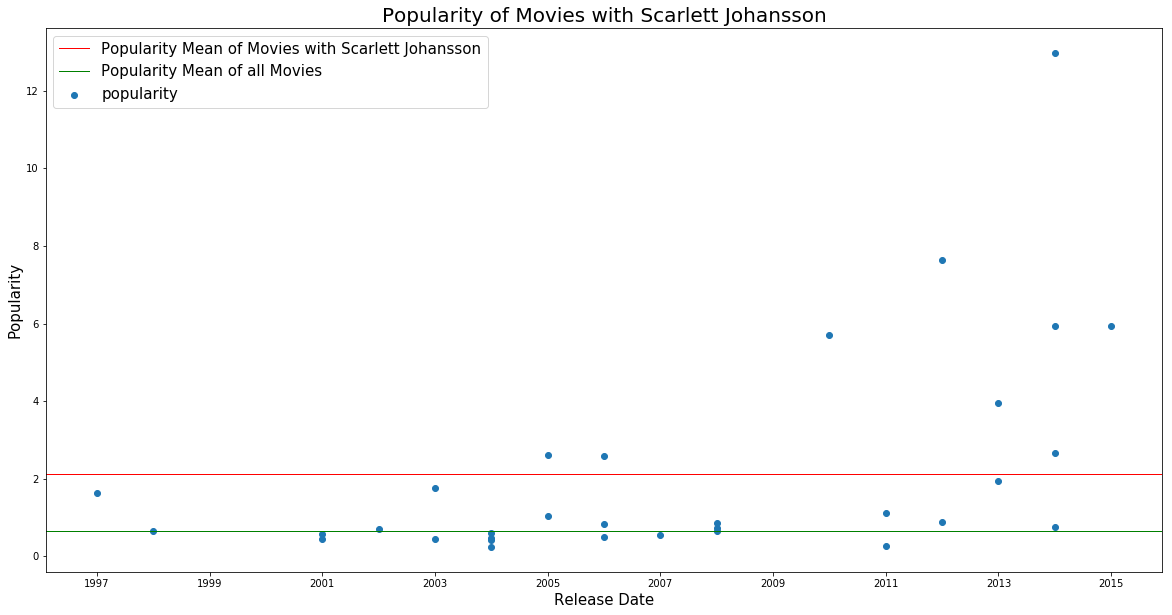

In [28]:
#Defining Plot
plt.figure(figsize=(20,10))
plt.title('Popularity of Movies with Scarlett Johansson', fontdict={'fontsize':20})
plt.xlabel('Release Date', fontdict={'fontsize':15})
plt.ylabel('Popularity', fontdict={'fontsize':15})

#Plotting Data
plt.scatter(movie_data.sort_values(by=['release_date']).loc[scarlett].sort_values(by=['release_date'])['release_date'].dt.year, 
         movie_data.sort_values(by=['release_date']).loc[scarlett].sort_values(by=['release_date'])['popularity'])

#Plotting Means
plt.axhline(movie_data.popularity[scarlett].mean(), color='r', label='Popularity Mean of Movies with Scarlett Johansson', linewidth=1)
plt.axhline(movie_data.popularity.mean(), color='g', label='Popularity Mean of all Movies', linewidth=1)

plt.legend(prop={'size': 15})
plt.xticks(np.arange(1997, 2016, step=2))
plt.show()

#### Genres of Scarlett Johansson Movies

After this, I want to check if there are genres in which Scarlett Johansson does appear more often. Since the genre column can contain more than one genre and are seperated by a '|', I chose to split the strings and transform the list of lists back into a Dataframe to count each genre.

In [29]:
#Making list of lists
scarlett_genres = movie_data[scarlett].genres.str.split('|').tolist()

#Using for Loop to generate one dimensional list
all_scarlett_genres_list = []
for sublist in scarlett_genres:
    for item in sublist:
        all_scarlett_genres_list.append(item)

#Transform it back into a dataframe
all_scarlett_genres = pd.DataFrame(all_scarlett_genres_list, columns=['genres'])

#Using .value_counts to get th enumber of each genre
all_scarlett_genres.genres.value_counts()

Drama              19
Comedy             12
Science Fiction     9
Romance             8
Action              8
Thriller            6
Adventure           5
Crime               4
Mystery             2
Family              2
Horror              1
Documentary         1
Name: genres, dtype: int64

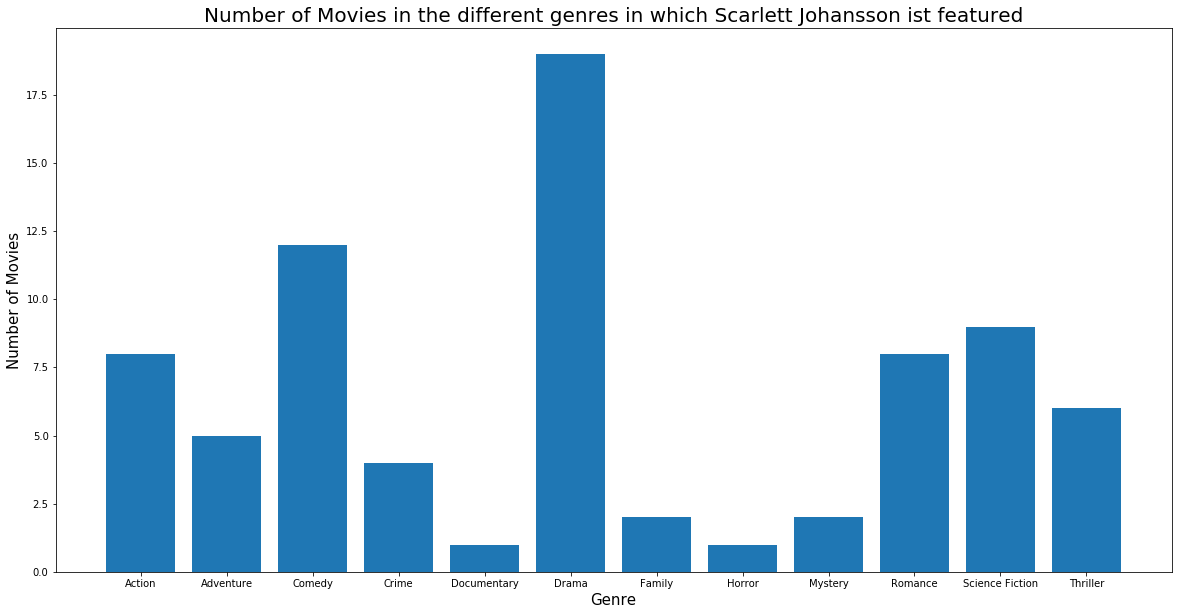

In [30]:
#Define Plot
plt.figure(figsize=(20,10))
plt.title('Number of Movies in the different genres in which Scarlett Johansson ist featured', fontdict={'fontsize':20})
plt.xlabel('Genre', fontdict={'fontsize':15})
plt.ylabel('Number of Movies', fontdict={'fontsize':15})

#Plotting Data 
plt.bar(all_scarlett_genres.genres.value_counts().index,
        all_scarlett_genres.genres.value_counts())

plt.show()

### Research Question 3: How well received are movies of the genres action and science fiction featuring Scarlett Johansson?

For the third Research Question I plot the movies of Scarlett Johansson grouped by the genre to evaluate the popularity of these movies over their release date. Please note, that I grouped by the Year of the release date, which is why in years, where are more than one movie of the respective genre the mean is plotted.

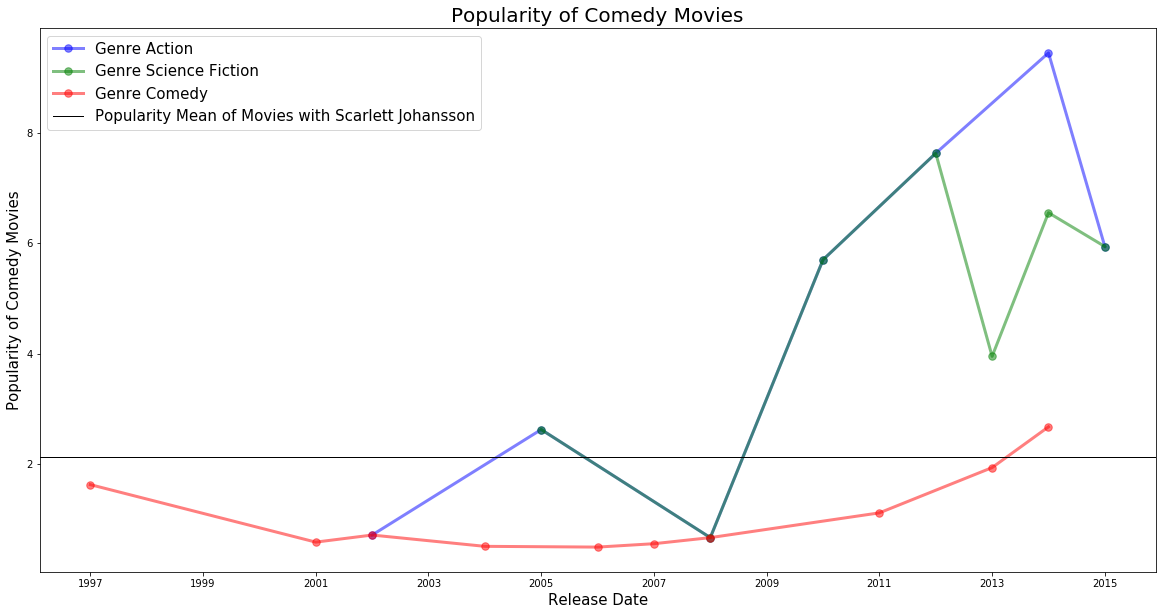

In [31]:
#Define Plot
plt.figure(figsize=(20,10))
plt.title('Popularity of Comedy Movies', fontdict={'fontsize':20})
plt.xlabel('Release Date', fontdict={'fontsize':15})
plt.ylabel('Popularity of Comedy Movies', fontdict={'fontsize':15})

#Plotting Data 
plt.plot(movie_data.release_date.dt.year[action&scarlett].value_counts().index.sort_values(), 
        movie_data.popularity[action&scarlett].groupby([movie_data.release_date.dt.year]).mean(), 
        color='b', marker='.', markersize=15, alpha=0.5, linewidth=3, label='Genre Action')
plt.plot(movie_data.release_date.dt.year[science&scarlett].value_counts().index.sort_values(), 
        movie_data.popularity[science&scarlett].groupby([movie_data.release_date.dt.year]).mean(), 
        color='g', marker='.', markersize=15, alpha=0.5, linewidth=3, label='Genre Science Fiction')
plt.plot(movie_data.release_date.dt.year[comedy&scarlett].value_counts().index.sort_values(), 
        movie_data.popularity[comedy&scarlett].groupby([movie_data.release_date.dt.year]).mean(), 
        color='r', marker='.', markersize=15, alpha=0.5, linewidth=3, label='Genre Comedy')

#Plotting Means
plt.axhline(movie_data.popularity[scarlett].mean(), color='black', label='Popularity Mean of Movies with Scarlett Johansson', linewidth=1)

plt.xticks(np.arange(1997, 2016, step=2))
plt.legend(prop={'size': 15})
plt.show()

<a id='conclusions'></a>
## Conclusions

### Research Question 1

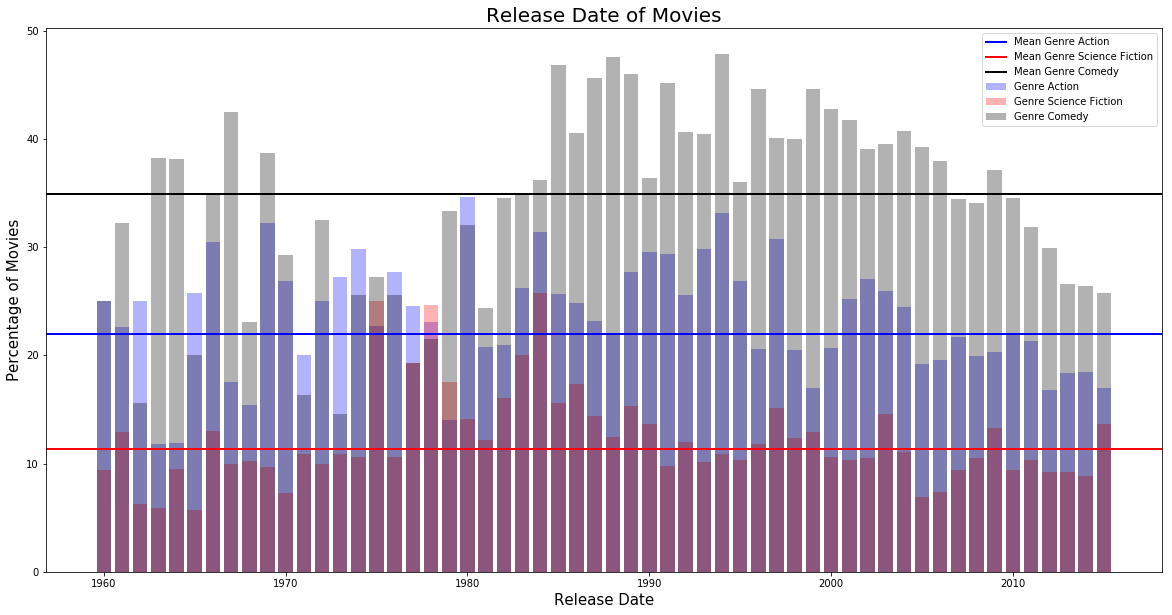

In [32]:
#Defining Plot
plt.figure(figsize=(20,10))
plt.title('Release Date of Movies', fontdict={'fontsize':20})
plt.xlabel('Release Date', fontdict={'fontsize':15})
plt.ylabel('Percentage of Movies', fontdict={'fontsize':15})
plt.legend(prop={'size': 15})

#Plotting Genre Action
plt.bar(movie_data.release_date.dt.year[action].value_counts().index.sort_values(), 
        (movie_data.original_title[action].groupby([movie_data.release_date.dt.year]).count()/
         movie_data.original_title.groupby([movie_data.release_date.dt.year]).count())*100,
        label='Genre Action', alpha=0.3, color='b')
plt.axhline((movie_data.original_title[action].groupby([movie_data.release_date.dt.year]).count().sum()/
             movie_data.original_title.groupby([movie_data.release_date.dt.year]).count().sum())*100,
            color='b', label='Mean Genre Action', linewidth=2)

#Plotting Genre Science Fiction
plt.bar(movie_data.release_date.dt.year[science].value_counts().index.sort_values(), 
        (movie_data.original_title[science].groupby([movie_data.release_date.dt.year]).count()/
         movie_data.original_title.groupby([movie_data.release_date.dt.year]).count())*100, 
        label='Genre Science Fiction', alpha=0.3, color='r')
plt.axhline((movie_data.original_title[science].groupby([movie_data.release_date.dt.year]).count().sum()/
             movie_data.original_title.groupby([movie_data.release_date.dt.year]).count().sum())*100,
            color='r', label='Mean Genre Science Fiction', linewidth=2)

#Plotting Genre Comdey
plt.bar(movie_data.release_date.dt.year[comedy].value_counts().index.sort_values(), 
        (movie_data.original_title[comedy].groupby([movie_data.release_date.dt.year]).count()/
         movie_data.original_title.groupby([movie_data.release_date.dt.year]).count())*100,
        label='Genre Comedy', alpha=0.3, color='black')
plt.axhline((movie_data.original_title[comedy].groupby([movie_data.release_date.dt.year]).count().sum()/
             movie_data.original_title.groupby([movie_data.release_date.dt.year]).count().sum())*100,
            color='black', label='Mean Genre Comedy', linewidth=2)

plt.legend(prop={'size': 10})
plt.show()

As seen in the Chart above movies of these genres have a different perecntage of all th emovies of the respective year. A few conclusions can be derived from this plot:
1. Over all the years movies with the genre comedy make up most of the movies in comparison to the other genres. With a mean of around 35% they are around twice as common as Science Fiction Movies. Looking at the mean, they are around 10 percent more often released than action movies.
2. The release of Science Fictions movies is quite stable over the existing release dates. Around the 1980s they are released more often than their mean.
3. In comparioson movies of the genre Comedy have their peak in the 1990s whereas action movies are the most volatile from year to year

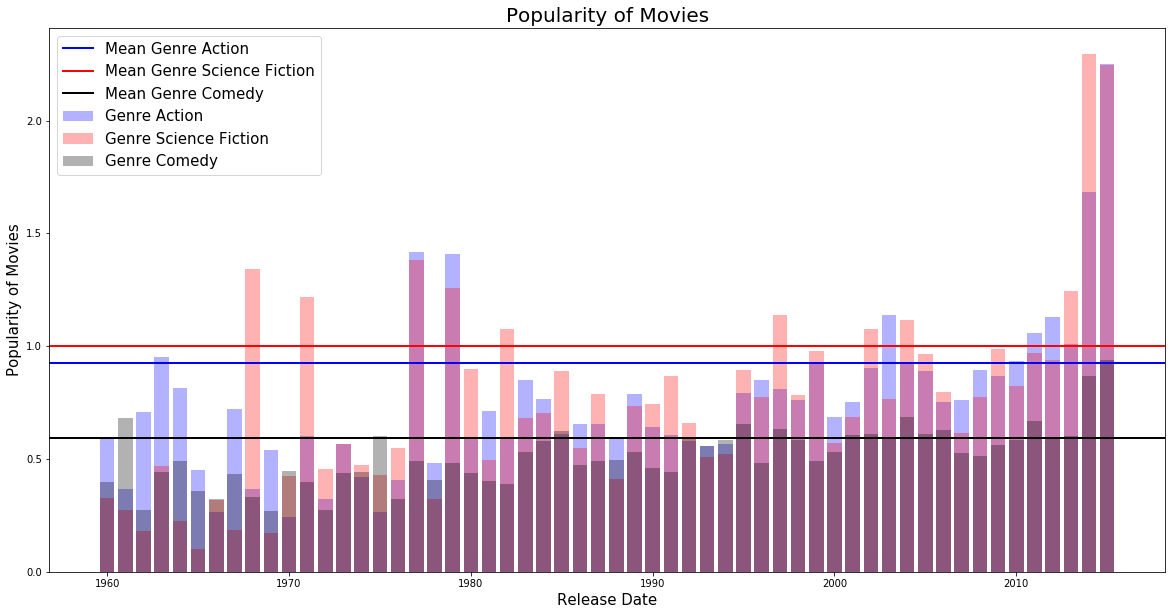

In [33]:
#Defining Plot
plt.figure(figsize=(20,10))
plt.title('Popularity of Movies', fontdict={'fontsize':20})
plt.xlabel('Release Date', fontdict={'fontsize':15})
plt.ylabel('Popularity of Movies', fontdict={'fontsize':15})

#Plotting genre Action
plt.bar(movie_data.release_date.dt.year[action].value_counts().index.sort_values(), 
        movie_data.popularity[action].groupby([movie_data.release_date.dt.year]).mean(),
        label='Genre Action', alpha=0.3, color='b')
plt.axhline(movie_data.popularity[action].mean(),
            color='b', label='Mean Genre Action', linewidth=2)

#Plotting Genre Sciene Fiction
plt.bar(movie_data.release_date.dt.year[science].value_counts().index.sort_values(), 
        movie_data.popularity[science].groupby([movie_data.release_date.dt.year]).mean(),
        label='Genre Science Fiction', alpha=0.3, color='r')
plt.axhline(movie_data.popularity[science].mean(), color='r', label='Mean Genre Science Fiction', linewidth=2)

#Plotting Genre Comedy
plt.bar(movie_data.release_date.dt.year[comedy].value_counts().index.sort_values(), 
        movie_data.popularity[comedy].groupby([movie_data.release_date.dt.year]).mean(),
        label='Genre Comedy', alpha=0.3, color='black')
plt.axhline(movie_data.popularity[comedy].mean(),
            color='black', label='Mean Genre Comedy', linewidth=2)

plt.legend(prop={'size': 15})
plt.show()

Looking at the popularity of the different genres we see a interesting change in comparison to the release count of the genres:
1. Comedy movies are the most unpopular in comparison to movies of the genre Action and Science fiction with an average popularity of around 0,6
2. Action movies are the second most popular movies, but are close to the Science Fiction movies who have an average popularity of around 1.0
3. Since Popularity is a recent calculated value (from the date of the export of the dataset https://developers.themoviedb.org/3/getting-started/popularity ), it can't tell about the popularity of the movies in their respective release year, but it is interesting to see, that science fiction movies from the 1970s and Science Fiction and Action Movies just right before 1980 having on average the second highest popularity in comparison to 2015 and 2014

### Research Question 2

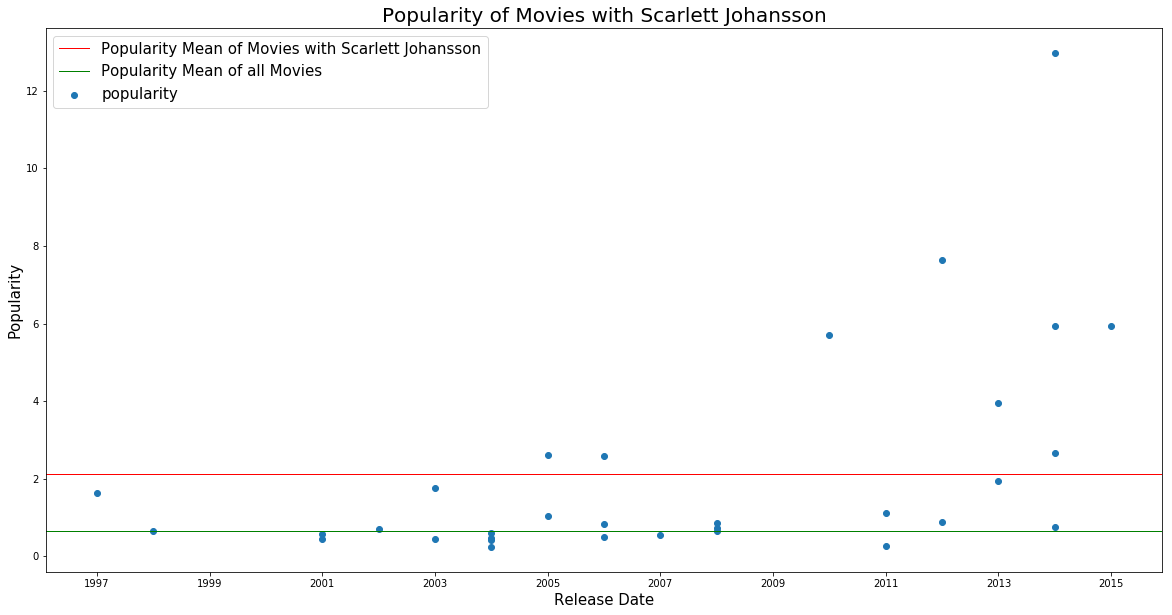

In [34]:
#Defining Plot
plt.figure(figsize=(20,10))
plt.title('Popularity of Movies with Scarlett Johansson', fontdict={'fontsize':20})
plt.xlabel('Release Date', fontdict={'fontsize':15})
plt.ylabel('Popularity', fontdict={'fontsize':15})

#Plotting Data
plt.scatter(movie_data.sort_values(by=['release_date']).loc[scarlett].sort_values(by=['release_date'])['release_date'].dt.year, 
         movie_data.sort_values(by=['release_date']).loc[scarlett].sort_values(by=['release_date'])['popularity'])

#Plotting Means
plt.axhline(movie_data.popularity[scarlett].mean(), color='r', label='Popularity Mean of Movies with Scarlett Johansson', linewidth=1)
plt.axhline(movie_data.popularity.mean(), color='g', label='Popularity Mean of all Movies', linewidth=1)

plt.legend(prop={'size': 15})
plt.xticks(np.arange(1997, 2016, step=2))
plt.show()

Checking the Popularity of Scarlett Johansson movies, we can see, that most of her most popular movies are from the era after 2010. Before that, all of her movies have a popularity around the mean of the popularity of the whoile dataset. Nevertheless on average, movies with Scarlett Johansson are around twice as popular as the dataset popularity mean.

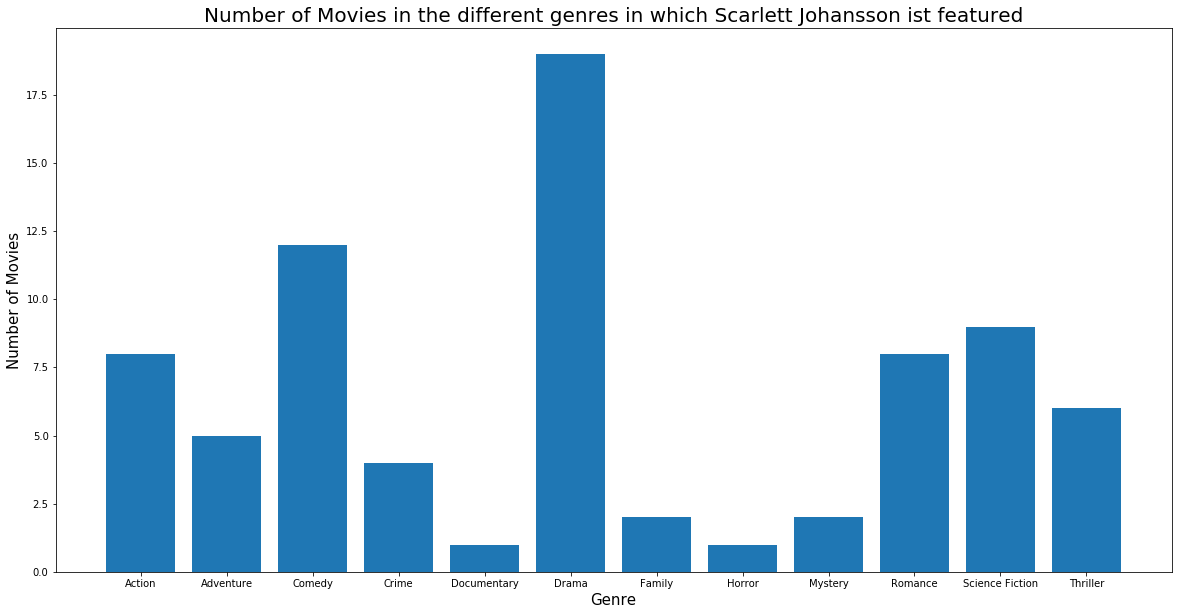

In [35]:
#Define Plot
plt.figure(figsize=(20,10))
plt.title('Number of Movies in the different genres in which Scarlett Johansson ist featured', fontdict={'fontsize':20})
plt.xlabel('Genre', fontdict={'fontsize':15})
plt.ylabel('Number of Movies', fontdict={'fontsize':15})

#Plotting Data 
plt.bar(all_scarlett_genres.genres.value_counts().index,
        all_scarlett_genres.genres.value_counts())

plt.show()

Scarlett Johansson was featured most in movies with the genre Drama, Comedy is in second place, while Science Fiction, Romance and Action are the subsequent movies. 

### Research Question 3

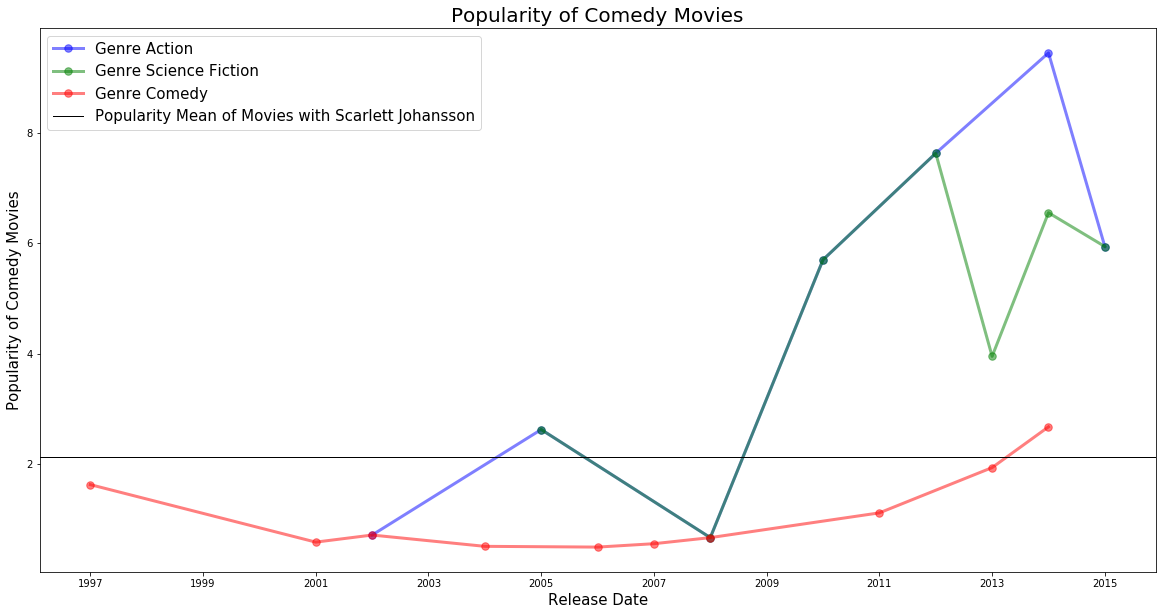

In [36]:
#Define Plot
plt.figure(figsize=(20,10))
plt.title('Popularity of Comedy Movies', fontdict={'fontsize':20})
plt.xlabel('Release Date', fontdict={'fontsize':15})
plt.ylabel('Popularity of Comedy Movies', fontdict={'fontsize':15})

#Plotting Data 
plt.plot(movie_data.release_date.dt.year[action&scarlett].value_counts().index.sort_values(), 
        movie_data.popularity[action&scarlett].groupby([movie_data.release_date.dt.year]).mean(), 
        color='b', marker='.', markersize=15, alpha=0.5, linewidth=3, label='Genre Action')
plt.plot(movie_data.release_date.dt.year[science&scarlett].value_counts().index.sort_values(), 
        movie_data.popularity[science&scarlett].groupby([movie_data.release_date.dt.year]).mean(), 
        color='g', marker='.', markersize=15, alpha=0.5, linewidth=3, label='Genre Science Fiction')
plt.plot(movie_data.release_date.dt.year[comedy&scarlett].value_counts().index.sort_values(), 
        movie_data.popularity[comedy&scarlett].groupby([movie_data.release_date.dt.year]).mean(), 
        color='r', marker='.', markersize=15, alpha=0.5, linewidth=3, label='Genre Comedy')

#Plotting Means
plt.axhline(movie_data.popularity[scarlett].mean(), color='black', label='Popularity Mean of Movies with Scarlett Johansson', linewidth=1)

plt.xticks(np.arange(1997, 2016, step=2))
plt.legend(prop={'size': 15})
plt.show()

Combining these data we can look further into it and find, that just one movie with the genre comedy exceeded the mean of the popularity of the movies featuring her. This movie is Chef (see below).

In [37]:
movie_data[scarlett&comedy&(movie_data.popularity>movie_data.popularity[scarlett].mean())].loc[:, ['original_title', 'genres', 'release_date', 'popularity']]

,original_title,genres,release_date,popularity
680,Chef,Comedy,2014-05-08,2.67235


The movies which are the most popular featuring Scarlett Johansson are of the genre Action and Science Fiction. Looking at these movies, we can see that four of those movies are from the Marvel Franchise where she acts in the role of Black Widow. Those are by far her most popular on average.

In [38]:
movie_data[scarlett&(action|science)&(movie_data.popularity>movie_data.popularity[scarlett].mean())].loc[:, ['original_title', 'genres', 'release_date', 'popularity']].sort_values(by=['release_date'])

,original_title,genres,release_date,popularity
6198,The Island,Action|Thriller|Science Fiction|Adventure,2005-07-20,2.623346
1920,Iron Man 2,Adventure|Action|Science Fiction,2010-04-28,5.704860
4361,The Avengers,Science Fiction|Action|Adventure,2012-04-25,7.637767
5433,Her,Romance|Science Fiction|Drama,2013-12-18,3.951582
631,Captain America: The Winter Soldier,Action|Adventure|Science Fiction,2014-03-20,12.971027
644,Lucy,Action|Science Fiction,2014-07-14,5.947136
14,Avengers: Age of Ultron,Action|Adventure|Science Fiction,2015-04-22,5.944927


### Limitations

At the end I want to state, that this analysis just examines a small part of the dataset as defined by the research questions in the beginning and is limited by the quality and scope of the dataset. Since it is already 2021 and the dataset ends with data in 2015, the conclusions in this exploratory data analysis is not definit and are just for learning purposes as part of the Data Analyst Nanodegree program. Additionally, since this data ist not tested statistically, any found correlation does not imply causalisation.

<a id='literature'></a>
## Sources

- https://matplotlib.org/3.1.1/contents.html
- https://stackoverflow.com/questions/34682828/extracting-specific-selected-columns-to-new-dataframe-as-a-copy
- https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html
- https://www.w3resource.com/pandas/series/series-str-split.php
- https://stackoverflow.com/questions/27709992/average-line-for-bar-chart-in-matplotlib
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.year.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.html
- https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/
- https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-list-of-lists
- https://stackoverflow.com/questions/27965295/dropping-rows-from-dataframe-based-on-a-not-in-condition